# Assignment:Different CNN Architectures on MNIST dataset

In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.initializers import he_normal
from keras.layers.normalization import BatchNormalization
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()


Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step


In [2]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [0]:
# this function is used draw Categorical Crossentropy Loss VS No. of epochs plot
def plt_dynamic(x, vy, ty):
  ax.plot(x, vy, 'b', label="Validation Loss")
  ax.plot(x, ty, 'r', label="Train Loss")
  plt.legend()
  plt.grid()
  plt.show()

# CNN with 3 Convolutional layers and kernel size - (3X3)

In [4]:
# Initialising the model
model3 = Sequential()

# Adding first conv layer
model3.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))

# Adding second conv layer
model3.add(Conv2D(64, (3, 3), activation='relu'))

# Adding Maxpooling layer
model3.add(MaxPooling2D(pool_size=(2, 2)))

# Adding Dropout
model3.add(Dropout(0.25))

# Adding third conv layer
model3.add(Conv2D(128, (3, 3), activation='relu'))

# Adding Maxpooling layer
model3.add(MaxPooling2D(pool_size=(2, 2)))

# Adding Dropout
model3.add(Dropout(0.25))

# Adding flatten layer
model3.add(Flatten())

# Adding first hidden layer
model3.add(Dense(256, activation='relu',kernel_initializer=he_normal(seed=None)))

# Adding Dropout
model3.add(Dropout(0.5))

# Adding output layer
model3.add(Dense(num_classes, activation='softmax'))

# Printing model Summary
print(model3.summary())

# Compiling the model
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fitting the data to the model
history = model3.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxP

Test score: 0.016924540818311743
Test accuracy: 0.9948


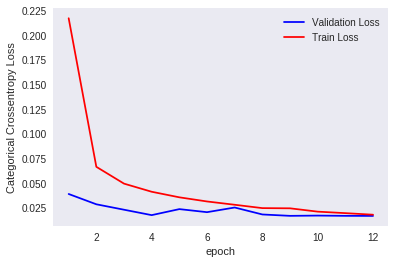

In [5]:
# Evaluating the model
score = model3.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# Plotting Train and Test Loss VS no. of epochs
# list of epoch numbers
x = list(range(1,epochs+1))

# Validation loss
vy = history.history['val_loss']
# Training loss
ty = history.history['loss']

# Calling the function to draw the plot
plt_dynamic(x, vy, ty)

# CNN with 5 Convolutional layers and kernel size - (5X5)

In [6]:
# Initialising the model
model5 = Sequential()

# Adding first conv layer
model5.add(Conv2D(10, kernel_size=(5, 5),padding='same',activation='relu',input_shape=input_shape))

# Adding second conv layer
model5.add(Conv2D(20, (5, 5), activation='relu'))

# Adding Maxpooling layer
model5.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

# Adding Dropout
model5.add(Dropout(0.25))

# Adding third conv layer
model5.add(Conv2D(35, (5, 5),padding='same', activation='relu'))

# Adding Maxpooling layer
model5.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

# Adding Dropout
model5.add(Dropout(0.25))

# Adding fourth conv layer
model5.add(Conv2D(70, (5, 5),padding='same',activation='relu'))

# Adding fifth conv layer
model5.add(Conv2D(80, (5, 5), activation='relu'))

# Adding Maxpooling layer
model5.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

# Adding Dropout
model5.add(Dropout(0.25))

# Adding flatten layer
model5.add(Flatten())

# Adding first hidden layer
model5.add(Dense(256, activation='relu',kernel_initializer=he_normal(seed=None)))

# Adding Batch Normalization
model5.add(BatchNormalization())

# Adding Dropout
model5.add(Dropout(0.5))


# Adding output layer
model5.add(Dense(num_classes, activation='softmax'))

# Printing model Summary
print(model5.summary())

# Compiling the model
model5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fitting the data to the model
history= model5.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 10)        260       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 20)        5020      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 20)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 12, 20)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 12, 12, 35)        17535     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 35)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 6, 6, 35)          0         
__________

Test score: 0.021511626279931806
Test accuracy: 0.9932


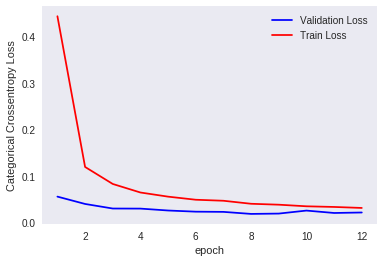

In [7]:
# Evaluating the model
score = model5.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# Plotting Train and Test Loss VS no. of epochs
# list of epoch numbers
x = list(range(1,epochs+1))

# Validation loss
vy = history.history['val_loss']
# Training loss
ty = history.history['loss']

# Calling the function to draw the plot
plt_dynamic(x, vy, ty)

# CNN with 7 Convolutional layers and kernel size - (2X2)

In [8]:
model7 = Sequential()

# Adding first conv layer
model7.add(Conv2D(10, kernel_size=(2, 2),padding='same',activation='relu',input_shape=input_shape))

# Adding second conv layer
model7.add(Conv2D(20, (2, 2), activation='relu'))

# Adding Maxpooling layer
model7.add(MaxPooling2D(pool_size=(3, 3), strides=(1,1)))

# Adding Dropout
model7.add(Dropout(0.3))

# Adding third conv layer
model7.add(Conv2D(40, (2, 2), activation='relu'))

# Adding Maxpooling layer
model7.add(MaxPooling2D(pool_size=(2, 2),padding='same'))


# Adding fourth conv layer
model7.add(Conv2D(60, (2, 2),padding='same',activation='relu'))

# Adding fifth conv layer
model7.add(Conv2D(120, (2, 2), activation='relu'))

# Adding Maxpooling layer
model7.add(MaxPooling2D(pool_size=(3, 3),padding='same'))

# Adding Dropout
model7.add(Dropout(0.25))

# Adding sixth conv layer
model7.add(Conv2D(120, (2, 2),padding='same',activation='relu'))

# Adding seventh conv layer
model7.add(Conv2D(240, (2, 2), activation='relu'))

# Adding Maxpooling layer
model7.add(MaxPooling2D(pool_size=(2, 2), strides=(1,1)))

# Adding Dropout
model7.add(Dropout(0.25))

# Adding flatten layer
model7.add(Flatten())

# Adding first hidden layer
model7.add(Dense(256, activation='relu',kernel_initializer=he_normal(seed=None)))

# Adding Batch Normalization
model7.add(BatchNormalization())

# Adding Dropout
model7.add(Dropout(0.5))

# Adding second hidden layer
model7.add(Dense(128, activation='relu',kernel_initializer=he_normal(seed=None)))

# Adding Dropout
model7.add(Dropout(0.25))

# Adding output layer
model7.add(Dense(num_classes, activation='softmax'))

# Printing model Summary
print(model7.summary())

# Compiling the model
model7.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fitting the data to the model
history = model7.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 10)        50        
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 27, 27, 20)        820       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 25, 25, 20)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 25, 25, 20)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 40)        3240      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 40)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 12, 12, 60)        9660      
__________

Test score: 0.03518788337475271
Test accuracy: 0.9909


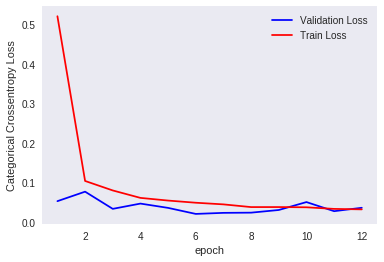

In [9]:
# Evaluating the model
score = model7.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# Plotting Train and Test Loss VS no. of epochs
# list of epoch numbers
x = list(range(1,epochs+1))

# Validation loss
vy = history.history['val_loss']
# Training loss
ty = history.history['loss']

# Calling the function to draw the plot
plt_dynamic(x, vy, ty)

In [11]:
import pandas as pd
models = pd.DataFrame({'Model': ['CNN 3-conv layer with kernal size (3,3)', 'CNN 5-conv layer with kernal size(5,5)', "CNN 7-conv layer with kernal size(2,2)"], 'Test score' : [0.019,0.021,0.035],'Accuracy': [0.9943,0.9948,0.9909]}, columns = ["Model","Test score","Accuracy"])
models

,Model,Test score,Accuracy
0,"CNN 3-conv layer with kernal size (3,3)",0.019,0.9943
1,"CNN 5-conv layer with kernal size(5,5)",0.021,0.9948
2,"CNN 7-conv layer with kernal size(2,2)",0.035,0.9909


**Conclusion**

1.Load mnist dataset.

2.Split the dataset into train and test.

3.Normalize the data.

4.convert class vectors to binary class matrices.

5.Implement Softmax classifier with 3 , 5 and 7 CONV layers of of kernel size 3 , 4 and 2 with hidden layers, batchnormalizer and different dropoutrates .

6.Ploting Categorical Crossentropy Loss VS No.of Epochs plot .